# Analyze Google Play Store dataset

```
Dashboard: https://datastudio.google.com/open/1aYKufdQ5ZW1mMSqXAPJ5y2WErK-tsMw9
```

## I - Some question to answer first
1. What are we analyze? What we want to get? What is our problems?
2. What is the metric of sucess?
3. Is the input dataset enough to solve our problems?

## II - Take a look at the dataset and clean it

### Import tool

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

### Google Drive authenication

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe 

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Download and read the dataset

In [0]:
link = 'https://drive.google.com/open?id=1jje-EQBSIp5FSsldVUfiQmH_3YcufwWx'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('google-play-store.csv')  

In [4]:
gpstore = pd.read_csv('google-play-store.csv')
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Get some information of this dataset

In [5]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
gpstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


### Take a look of values in each column and clean it

#### App

In [0]:
# sort by Last Updated
gpstore.sort_values(by='Last Updated', ascending=True, inplace=True)

# drop all the duplicated
gpstore.drop_duplicates(subset = ['App', 'Category', 'Type', 'Content Rating', 'Genres'], keep = False, inplace = True)

# that means we only keep the Latest Updated App in every app having the same values in ['App', 'Category', 'Type', 'Content Rating', 'Genres'] 

In [8]:
gpstore['App'].value_counts()

Video Editor                                          3
Jurassic World™ Alive                                 2
Bubble Shooter                                        2
No.Draw - Colors by Number 2018                       2
Talking Ben the Dog                                   2
Call Blocker                                          2
Chess Free                                            2
Peak – Brain Games & Training                         2
YouTube Gaming                                        2
HBO GO: Stream with TV Package                        2
Fuzzy Numbers: Pre-K Number Foundation                2
CppDroid - C/C++ IDE                                  2
Choices: Stories You Play                             2
PlayKids - Educational cartoons and games for kids    2
Edmodo                                                2
Mcqueen Coloring pages                                2
Red Bull TV: Live Sports, Music & Entertainment       2
Twitch: Livestream Multiplayer Games & Esports  

In [9]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8998 entries, 10472 to 6834
Data columns (total 13 columns):
App               8998 non-null object
Category          8998 non-null object
Rating            7542 non-null float64
Reviews           8998 non-null object
Size              8998 non-null object
Installs          8998 non-null object
Type              8997 non-null object
Price             8998 non-null object
Content Rating    8997 non-null object
Genres            8998 non-null object
Last Updated      8998 non-null object
Current Ver       8990 non-null object
Android Ver       8995 non-null object
dtypes: float64(1), object(12)
memory usage: 984.2+ KB


#### Category

In [10]:
gpstore['Category'].value_counts(dropna=False)

FAMILY                 1861
GAME                    871
TOOLS                   816
BUSINESS                387
PERSONALIZATION         363
LIFESTYLE               357
PRODUCTIVITY            341
MEDICAL                 336
FINANCE                 328
SPORTS                  300
COMMUNICATION           273
HEALTH_AND_FITNESS      247
PHOTOGRAPHY             244
NEWS_AND_MAGAZINES      234
BOOKS_AND_REFERENCE     213
SOCIAL                  200
TRAVEL_AND_LOCAL        195
SHOPPING                166
VIDEO_PLAYERS           156
MAPS_AND_NAVIGATION     125
DATING                  117
FOOD_AND_DRINK           98
EDUCATION                96
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  76
ENTERTAINMENT            75
EVENTS                   64
ART_AND_DESIGN           63
HOUSE_AND_HOME           62
PARENTING                60
BEAUTY                   53
COMICS                   52
1.9                       1
Name: Category, dtype: int64

**Why there's '1.9' in category list**

In [11]:
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Look like all the columns of this row has been shifted. Anyway this row is not reliable, we prefer to dropping it to fixing it

In [12]:
gpstore = gpstore[gpstore['Category'] != '1.9']
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 3304 to 6834
Data columns (total 13 columns):
App               8997 non-null object
Category          8997 non-null object
Rating            7541 non-null float64
Reviews           8997 non-null object
Size              8997 non-null object
Installs          8997 non-null object
Type              8996 non-null object
Price             8997 non-null object
Content Rating    8997 non-null object
Genres            8997 non-null object
Last Updated      8997 non-null object
Current Ver       8989 non-null object
Android Ver       8995 non-null object
dtypes: float64(1), object(12)
memory usage: 984.0+ KB


#### Rating

In [14]:
gpstore['Rating'].value_counts(dropna=False)

NaN    1456
4.3     799
4.4     787
4.5     749
4.2     728
4.6     606
4.1     569
4.0     479
4.7     414
3.9     342
3.8     275
5.0     268
3.7     216
4.8     210
3.6     160
3.5     149
3.4     124
3.3      98
4.9      85
3.0      79
3.1      69
3.2      62
2.9      45
2.8      39
2.6      23
2.7      21
2.3      20
2.5      19
2.4      19
1.0      16
2.2      14
2.0      12
1.9      10
1.8       8
2.1       8
1.7       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

There are so many NaN values in Rating column, so we will fill them by mean of the non-NaN values

In [15]:
gpstore['Rating'].fillna(round(gpstore[gpstore['Rating'].isnull() == False]['Rating'].mean(), 1), inplace = True) 
gpstore[gpstore['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Price

In [16]:
gpstore['Price'].value_counts(dropna=False)

0          8278
$0.99       142
$2.99       119
$1.99        73
$4.99        68
$3.99        54
$1.49        46
$5.99        25
$2.49        24
$9.99        17
$399.99      12
$6.99         9
$4.49         9
$3.49         7
$7.99         7
$14.99        7
$6.49         5
$8.99         5
$5.49         4
$19.99        4
$2.00         3
$1.00         3
$12.99        3
$29.99        3
$39.99        2
$17.99        2
$1.70         2
$13.99        2
$10.99        2
$8.49         2
           ... 
$1.97         1
$4.85         1
$154.99       1
$1.96         1
$28.99        1
$2.60         1
$3.28         1
$30.99        1
$4.29         1
$1.50         1
$14.00        1
$16.99        1
$3.04         1
$46.99        1
$3.88         1
$15.46        1
$2.56         1
$11.99        1
$1.20         1
$4.80         1
$400.00       1
$5.00         1
$2.50         1
$74.99        1
$109.99       1
$299.99       1
$3.02         1
$3.90         1
$389.99       1
$89.99        1
Name: Price, Length: 87,

In [17]:
# Price column's dtype is dtype('O') which is Python type string
gpstore.Price.dtype

dtype('O')

In [18]:
gpstore[gpstore['Type']=='Paid']['Price'].head() # e.g $4.99 is a string

4166    $3.88
9478    $2.99
7466    $0.99
7792    $3.49
2293    $7.99
Name: Price, dtype: object

In [19]:
# Price in $ is the column having numeric values of Price column
gpstore['Price in $'] = gpstore['Price'].str.lstrip('$').apply(lambda str_f: float(str_f))
gpstore['Price in $'].dtype

dtype('float64')

In [20]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 3304 to 6834
Data columns (total 14 columns):
App               8997 non-null object
Category          8997 non-null object
Rating            8997 non-null float64
Reviews           8997 non-null object
Size              8997 non-null object
Installs          8997 non-null object
Type              8996 non-null object
Price             8997 non-null object
Content Rating    8997 non-null object
Genres            8997 non-null object
Last Updated      8997 non-null object
Current Ver       8989 non-null object
Android Ver       8995 non-null object
Price in $        8997 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


#### Type

In [21]:
gpstore['Type'].value_counts(dropna=False)

Free    8277
Paid     719
NaN        1
Name: Type, dtype: int64

In [22]:
#Type columns has 1 null
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0.0


In [23]:
# Exclude that row
gpstore.dropna(subset=['Type'], inplace=True)
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [24]:
# check if there are any row that Price is 0 but Type is not Free
gpstore[(gpstore['Price'] == '0') & (gpstore['Type'] != 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [25]:
# check if there are any row that Price is greater than 0 but Type is not Paid
gpstore[(gpstore['Price in $'] > 0) & (gpstore['Type'] != 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [26]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8996 entries, 3304 to 6834
Data columns (total 14 columns):
App               8996 non-null object
Category          8996 non-null object
Rating            8996 non-null float64
Reviews           8996 non-null object
Size              8996 non-null object
Installs          8996 non-null object
Type              8996 non-null object
Price             8996 non-null object
Content Rating    8996 non-null object
Genres            8996 non-null object
Last Updated      8996 non-null object
Current Ver       8988 non-null object
Android Ver       8994 non-null object
Price in $        8996 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


#### Content Rating

In [27]:
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           7417
Teen                962
Mature 17+          316
Everyone 10+        296
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [28]:
#Unrated can be considered as NaN value and there are only 2 row having Unrated value in Content Rating column, so we drop them =))
gpstore = gpstore[gpstore['Content Rating'] != 'Unrated']
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           7417
Teen                962
Mature 17+          316
Everyone 10+        296
Adults only 18+       3
Name: Content Rating, dtype: int64

In [29]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8994 entries, 3304 to 6834
Data columns (total 14 columns):
App               8994 non-null object
Category          8994 non-null object
Rating            8994 non-null float64
Reviews           8994 non-null object
Size              8994 non-null object
Installs          8994 non-null object
Type              8994 non-null object
Price             8994 non-null object
Content Rating    8994 non-null object
Genres            8994 non-null object
Last Updated      8994 non-null object
Current Ver       8986 non-null object
Android Ver       8992 non-null object
Price in $        8994 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


#### Reviews / Genres / Last Updated
These columns don't seem to need  cleaning

In [30]:
gpstore['Reviews'].value_counts(dropna=False)

0          589
1          271
2          212
3          165
4          137
5          108
6           91
7           87
8           70
9           63
10          61
12          56
11          52
13          49
17          46
19          41
14          41
20          35
16          35
21          33
30          30
25          30
24          30
15          29
38          29
18          27
22          26
23          25
27          25
33          24
          ... 
216741       1
29270        1
226541       1
940          1
697939       1
16073        1
36969        1
10054        1
5637451      1
1901         1
1343         1
1660         1
219745       1
2520         1
23971        1
137696       1
10944        1
2533         1
24349        1
1519671      1
4581         1
67071        1
186648       1
13519        1
13950        1
811          1
23063        1
37090        1
104583       1
50060        1
Name: Reviews, Length: 4741, dtype: int64

In [31]:
gpstore['Genres'].value_counts(dropna=False)

Tools                                  814
Entertainment                          552
Education                              499
Business                               387
Personalization                        363
Lifestyle                              356
Productivity                           341
Medical                                336
Finance                                328
Sports                                 303
Communication                          273
Action                                 270
Health & Fitness                       247
Photography                            244
News & Magazines                       234
Books & Reference                      213
Social                                 200
Simulation                             198
Travel & Local                         194
Arcade                                 168
Shopping                               166
Casual                                 160
Video Players & Editors                154
Maps & Navi

In [32]:
gpstore['Last Updated'].value_counts(dropna=False)

August 3, 2018       217
August 2, 2018       187
July 31, 2018        163
August 1, 2018       162
July 30, 2018        135
July 26, 2018        123
July 25, 2018        103
July 27, 2018        102
July 24, 2018        101
July 23, 2018        101
July 19, 2018         88
July 18, 2018         85
August 6, 2018        83
August 4, 2018        79
July 12, 2018         78
July 17, 2018         76
July 9, 2018          75
July 3, 2018          75
July 11, 2018         73
July 16, 2018         72
July 5, 2018          70
July 13, 2018         68
July 20, 2018         58
May 24, 2018          56
June 26, 2018         50
June 25, 2018         50
July 28, 2018         47
July 4, 2018          47
July 6, 2018          47
June 13, 2018         47
                    ... 
November 25, 2013      1
February 11, 2013      1
June 26, 2011          1
October 7, 2013        1
August 2, 2014         1
June 10, 2015          1
January 28, 2014       1
August 12, 2015        1
January 9, 2015        1


#### Current Ver


In [33]:
gpstore[gpstore['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,0.99
7407,Calculate My IQ,FAMILY,4.2,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,0.00
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,0.00
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.2,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,0.00
7730,UFO-CQ,TOOLS,4.2,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,0.99
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,0.00
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,0.00
6803,BT Master,FAMILY,4.2,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up,0.00


In [0]:
# fill NaN value in Current Ver column with 1.0.0
gpstore['Current Ver'].fillna('1.0.0', inplace=True)

#### Android Ver

In [35]:
gpstore['Android Ver'].value_counts(dropna=False)

4.1 and up            2088
4.0.3 and up          1327
4.0 and up            1228
Varies with device     778
4.4 and up             723
2.3 and up             607
5.0 and up             459
4.2 and up             354
2.3.3 and up           266
2.2 and up             234
3.0 and up             222
4.3 and up             209
2.1 and up             132
1.6 and up             116
6.0 and up              51
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              21
1.5 and up              20
4.4W and up             10
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
NaN                      2
4.0.3 - 7.1.1            2
4.1 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [36]:
# Drop 2 NaN value
gpstore.dropna(subset=['Android Ver'], inplace=True)
gpstore[gpstore['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [37]:
# Standardize Android Ver: X.X.X - Y.Y.Y
regex = ' [\w+]+(?:\.\w+) '
gpstore['Android Ver'] = " " + gpstore['Android Ver'] + " "

gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('and', '-')
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('up', 'latest')

import re
def append_by_regex(text):
  search_value = re.search(regex, text)
  while search_value:
    pos = search_value.end()
    text = text[:pos].rstrip() + ".0 " + text[pos:] 
    search_value = re.search(regex, text)
  return text

gpstore['Android Ver'] = gpstore['Android Ver'].apply(append_by_regex)
gpstore['Android Ver'] = gpstore['Android Ver'].str.strip()
gpstore['Android Ver'].value_counts(dropna=False)

4.1.0 - latest        2088
4.0.3 - latest        1327
4.0.0 - latest        1228
Varies with device     778
4.4.0 - latest         723
2.3.0 - latest         607
5.0.0 - latest         459
4.2.0 - latest         354
2.3.3 - latest         266
2.2.0 - latest         234
3.0.0 - latest         222
4.3.0 - latest         209
2.1.0 - latest         132
1.6.0 - latest         116
6.0.0 - latest          51
7.0.0 - latest          42
3.2.0 - latest          36
2.0.0 - latest          32
5.1.0 - latest          21
1.5.0 - latest          20
4.4W.0 - latest         10
3.1.0 - latest          10
2.0.1 - latest           7
8.0.0 - latest           6
7.1.0 - latest           3
4.0.3 - 7.1.1            2
5.0.0 - 8.0.0            2
1.0.0 - latest           2
7.0.0 - 7.1.1            1
5.0.0 - 6.0.0            1
2.2.0 - 7.1.1            1
5.0.0 - 7.1.1            1
4.1.0 - 7.1.1            1
Name: Android Ver, dtype: int64

In [38]:
# Handle "Varies with device"

# split each value in Android Ver column into two columns Android MinVer and Android MaxVer
gpstore['Android MinVer'] = gpstore['Android Ver'].str.split('-').str[0].str.strip()
gpstore['Android MaxVer'] = gpstore['Android Ver'].str.split('-').str[1].str.strip()

# When there's not "-" in Android Ver string (in case Android Ver value is "Varies with device")
# Android MinVer values will be assigned with "Varies with device", so we re-assign theses values with NaN
gpstore['Android MinVer'].replace('Varies with device', np.NaN, inplace=True)

# Fillna in Android MinVer with min of non-null values in Android MinVer
gpstore['Android MinVer'].fillna(gpstore['Android MinVer'].dropna().min(), inplace=True)

# Fillna in Android MaxVer with max of non-null values in Android MaxVer
gpstore['Android MaxVer'].fillna(gpstore['Android MaxVer'].dropna().max(), inplace=True)

# Replace "- latest" with and up to restore the original form of Android Ver
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('- latest', "and up")
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $,Android MinVer,Android MaxVer
3304,Graphing Calculator,TOOLS,3.9,12388,5.3M,"1,000,000+",Free,0,Everyone,Tools,"April 1, 2016",1.17,2.3.0 and up,0.0,2.3.0,latest
9116,PHARMAGUIDE (DZ),HEALTH_AND_FITNESS,4.1,131,3.4M,"5,000+",Free,0,Everyone,Health & Fitness,"April 1, 2016",1.06,1.6.0 and up,0.0,1.6.0,latest
10589,The Florida Trail Guide,TRAVEL_AND_LOCAL,4.3,100,13M,"5,000+",Free,0,Everyone,Travel & Local,"April 1, 2017",6.0.18,4.1.0 and up,0.0,4.1.0,latest
7113,CBRadioTab,TOOLS,3.9,127,1.5M,"50,000+",Free,0,Everyone,Tools,"April 1, 2017",1.0,3.0.0 and up,0.0,3.0.0,latest
4500,Q*bert: Rebooted,GAME,4.3,13788,55M,"1,000,000+",Free,0,Everyone,Arcade,"April 1, 2017",1.1,4.4.0 and up,0.0,4.4.0,latest


In [39]:
# check our dataframe
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8992 entries, 3304 to 6834
Data columns (total 16 columns):
App               8992 non-null object
Category          8992 non-null object
Rating            8992 non-null float64
Reviews           8992 non-null object
Size              8992 non-null object
Installs          8992 non-null object
Type              8992 non-null object
Price             8992 non-null object
Content Rating    8992 non-null object
Genres            8992 non-null object
Last Updated      8992 non-null object
Current Ver       8992 non-null object
Android Ver       8992 non-null object
Price in $        8992 non-null float64
Android MinVer    8992 non-null object
Android MaxVer    8992 non-null object
dtypes: float64(2), object(14)
memory usage: 1.2+ MB


#### Install

In [40]:
gpstore['Installs'].value_counts()

1,000,000+        1302
100,000+          1068
10,000+           1009
1,000+             871
10,000,000+        754
100+               701
5,000,000+         538
500,000+           482
5,000+             461
50,000+            460
10+                384
500+               325
50+                203
50,000,000+        160
100,000,000+       100
5+                  82
1+                  67
0+                  14
500,000,000+         7
1,000,000,000+       4
Name: Installs, dtype: int64

In [41]:
# Installs column's dtype is dtype('O') which is Python type string
gpstore['Installs'].dtype

dtype('O')

In [0]:
# The number of installations of each app can be equal or greater than the value in Installs column
# So we create Installs At Least column having numeric value of the number of installations at least
gpstore['Installs At Least'] = gpstore['Installs'].replace('[^0-9]', '', regex=True).astype(int)

In [43]:
gpstore['Installs At Least'].value_counts()

1000000       1302
100000        1068
10000         1009
1000           871
10000000       754
100            701
5000000        538
500000         482
5000           461
50000          460
10             384
500            325
50             203
50000000       160
100000000      100
5               82
1               67
0               14
500000000        7
1000000000       4
Name: Installs At Least, dtype: int64

#### Size

In [44]:
gpstore['Size'].value_counts()

Varies with device    972
11M                   172
12M                   170
13M                   169
14M                   165
15M                   150
26M                   137
17M                   134
16M                   128
10M                   124
21M                   120
19M                   114
20M                   114
18M                   113
24M                   112
25M                   106
23M                    97
22M                    94
27M                    86
29M                    86
28M                    85
30M                    82
3.3M                   70
2.3M                   67
2.5M                   67
33M                    67
31M                    66
2.8M                   65
2.9M                   65
3.4M                   63
                     ... 
116k                    1
500k                    1
251k                    1
860k                    1
518k                    1
191k                    1
647k                    1
892k        

In [0]:
gpstore['Size In Byte'] = gpstore['Size']

In [0]:
import re

In [0]:
index_list = gpstore.index.values.tolist()
for indx in index_list:
  old_value = gpstore.at[indx, 'Size In Byte']
  if (old_value == 'Varies with device'):
    continue
  old_value_abs = re.findall('\d+\.*\d*', old_value)
  # Check to make sure only 1 number value
  if (len(old_value_abs) != 1):
    print(old_value)
  old_value_unit = re.findall('[^\d\W]$', old_value)
#   print(old_value_unit)
  new_value = 0
  if old_value_unit[0] == 'M':
    new_value = float(old_value_abs[0]) * 1000000
  elif old_value_unit[0] == 'k':
    new_value = float(old_value_abs[0]) * 1000
  else:
    print("Error: undefine unit ", old_value_unit)
  gpstore.at[indx, 'Size In Byte'] = new_value

Now we update "Varies with device" size by mean value of each category

In [0]:
cate_list = gpstore['Category'].unique().tolist()
gpstore['Size In Byte'].replace(to_replace='Varies with device', value=np.nan, inplace=True)
gpstore['Size In Byte'].astype('category', inplace=True)
for cate in cate_list:
  cate_size_mean = round(gpstore[gpstore['Category'] == cate]['Size In Byte'].mean(), 1)
  gpstore[gpstore['Category'] == cate] = gpstore[gpstore['Category'] == cate].fillna(cate_size_mean)
  

In [49]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8992 entries, 3304 to 6834
Data columns (total 18 columns):
App                  8992 non-null object
Category             8992 non-null object
Rating               8992 non-null float64
Reviews              8992 non-null object
Size                 8992 non-null object
Installs             8992 non-null object
Type                 8992 non-null object
Price                8992 non-null object
Content Rating       8992 non-null object
Genres               8992 non-null object
Last Updated         8992 non-null object
Current Ver          8992 non-null object
Android Ver          8992 non-null object
Price in $           8992 non-null float64
Android MinVer       8992 non-null object
Android MaxVer       8992 non-null object
Installs At Least    8992 non-null int64
Size In Byte         8992 non-null float64
dtypes: float64(3), int64(1), object(14)
memory usage: 1.6+ MB


## III. Let draw some figure

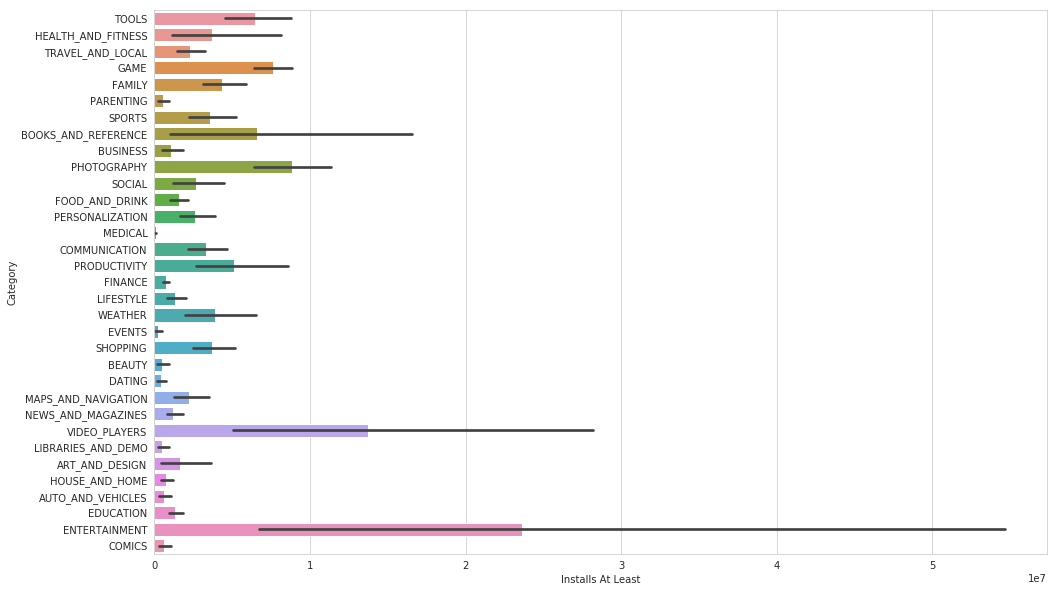

In [50]:
plt.figure(figsize=(16, 10))
sns.barplot(data=gpstore, y='Category', x='Installs At Least')

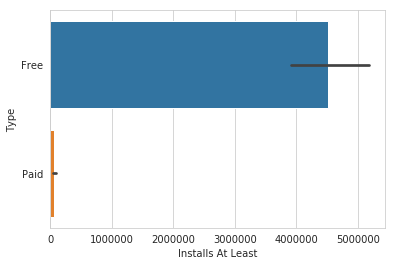

In [51]:
sns.barplot(data=gpstore, y='Type', x='Installs At Least')

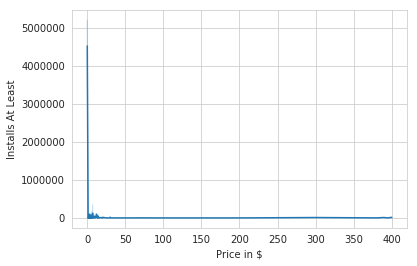

In [52]:
sns.lineplot(data=gpstore, x='Price in $', y='Installs At Least')

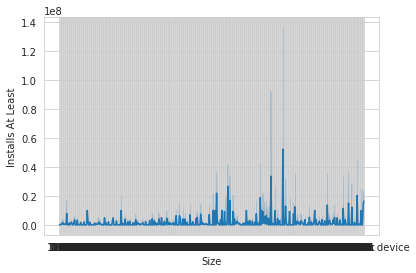

In [53]:
sns.lineplot(data=gpstore, x='Size', y='Installs At Least')

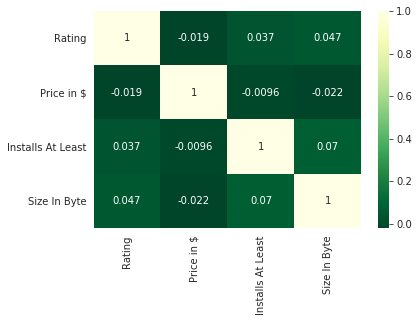

In [54]:
sns.heatmap(gpstore.corr(), annot=True, cmap='YlGn_r')

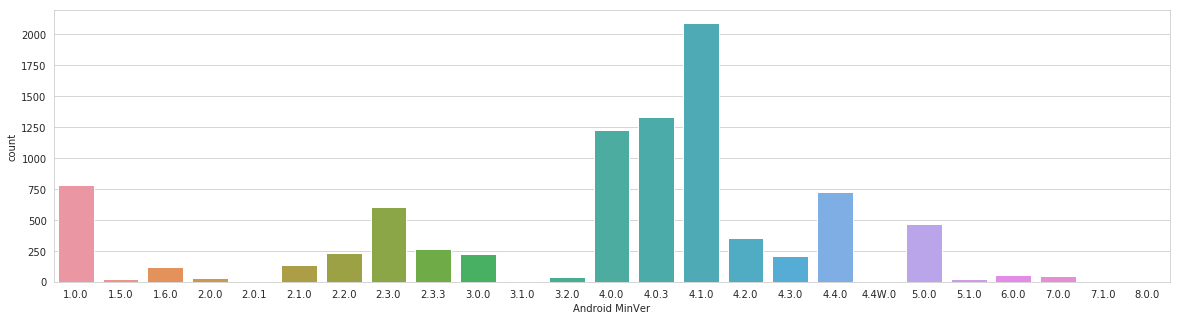

In [55]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore.sort_values(by='Android MinVer', ascending=True), x='Android MinVer')

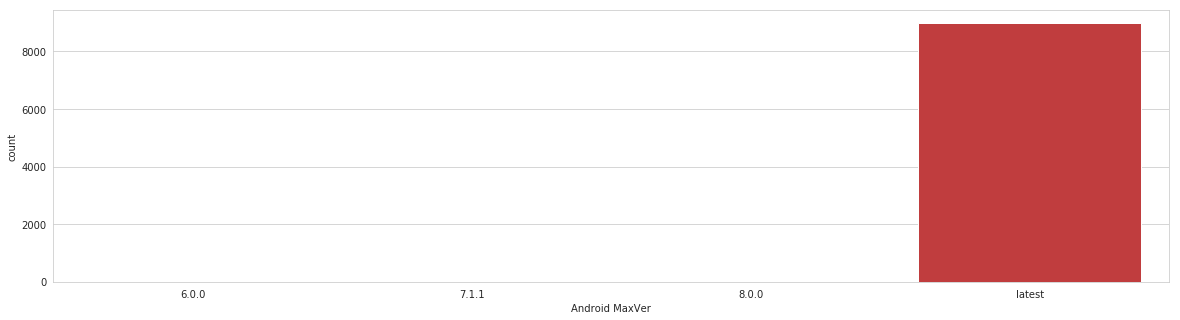

In [56]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore.sort_values(by='Android MaxVer', ascending=True), x='Android MaxVer')

## IV. Make Google sheet

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 

In [0]:
def check_exists(path):
  try:
    sh = gc.open(path)
    return True
  except:
    return False

def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
    sh.del_worksheet(sh.sheet1)
    return sh

In [0]:
sheets = {
    'Google Play Store': gpstore.columns.values.tolist()
}
sh = create_new_worksheet('Google Play Store', sheets)

In [60]:
sh.values_update(
  'Google Play Store!A2',
    params={'valueInputOption': 'RAW'},
    body={'values': gpstore.fillna('').values.tolist()}
)

{'spreadsheetId': '1me0j0fFWoqN61rlbQnfTNO539R-LTAvjP5SD5APTfq8',
 'updatedCells': 161856,
 'updatedColumns': 18,
 'updatedRange': "'Google Play Store'!A2:R8993",
 'updatedRows': 8992}